In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import glob
import re

In [3]:
def get_Data(csv, iteration = False):
    merged_dataset = pd.read_csv(csv)

    if(iteration):
        # merged_dataset = merged_dataset[merged_dataset["Iteration"] == 0]
        # merged_dataset = merged_dataset.drop(columns=["Type"])
        grouped_data = merged_dataset.groupby(['NaCl_ppm','MgSO4_ppm', "Iteration"])

    else:
        grouped_data = merged_dataset.groupby(['NaCl_ppm','MgSO4_ppm'])

    # Create a dictionary to store grouped data
    grouped_dict = {}
    # Iterate over groups and populate the dictionary
    for group_name, group_data in grouped_data:
        # print(group_name)
        tempDict = {}
        tempDF = group_data.drop(columns=['Iteration','Time','NaCl_ppm','MgSO4_ppm'])
        for col in tempDF.columns:
            vectorizedCol = tempDF[col].values
            tempDict[col] = vectorizedCol.copy()
        grouped_dict[group_name] = tempDict

    return grouped_dict



In [4]:
path = '../experiment_logs_UPDT/'
file = 'merged_experiments_fixed_iter_removed_q.csv'
file_path = path + file
grouped_dict = get_Data(file_path, iteration = True)


In [5]:
columns = pd.read_csv(file_path).columns


In [5]:
#for a in list((grouped_dict.values())):
#    print(a.values())

In [6]:
# Flattens the data
def arrangeData(dict):
    compArr = []
    for vals in list(dict.values()):
        arr = []
        for val in list(vals.values()):
            arr.extend(val.copy() - np.array(val).mean())
        compArr.append(arr.copy())
    
    return compArr



In [7]:
compArr = arrangeData(grouped_dict)

In [8]:
len(compArr[1])

4020

In [8]:
X = compArr
# X = np.array([[val for arr in list(vals.values()) for val in arr] ])

# Adjust the labels y to include both nacl_ppm and mgso4_ppm
y = [k[:2] for k in grouped_dict.keys()]



In [10]:
y

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 16.440157825515126),
 (0.0, 32.86950805302948),
 (0.0, 49.2880613362541),
 (0.0, 65.695828314902),
 (0.0, 82.09281961471105),
 (0.0, 98.4790458474669),
 (0.0, 114.85451761102604),
 (0.0, 131.21924548933842),
 (0.0, 147.5732400524705),
 (0.0, 163.9165118566277),
 (0.0, 180.2490714441774),
 (0.0, 196.5709293436715),
 (0.0, 212.882096069869),
 (0.0, 229.1825821237585),
 (0.0, 245.4723979925813),
 (0.0, 261.7515541498528),
 (0.0, 278.02006105538595),
 (0.0, 294.27792915531336),
 (0.0, 310.5251688821094),
 (0.0, 326.7617906546128),
 (0.0, 342.98780487804873),
 (0.0, 359.2032219440514),
 (0.0, 375.4080522306855),
 (0.0, 391.6023061024693),
 (0.0, 407.7859939103959),
 (0.0, 423.95912599195566),
 (0.0, 440.1217126711584),
 (0.0, 456.2737642585552),
 (0.0, 472.41529105125977),
 (0.0, 488.5463033329714),
 (0.0, 504.666811373996),
 (0.0, 520.7768254312683),
 (0.0, 536.8763557483732),
 (0.0, 552.9654125555676),
 (0.0, 569.0440060698028),
 (0.0, 585.112

In [11]:
len(X)

6354

In [12]:
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)



In [13]:
y_test

[(15597.108775137112, 13805.518281535651),
 (4018.169112508735, 4018.169112508735),
 (13105.839384828863, 15946.958718778907),
 (0.0, 1250.6680919294497),
 (9504.51647183847, 15000.0),
 (0.0, 9925.307557117749),
 (17023.75, 10952.321428571428),
 (9123.670103092783, 17938.103092783505),
 (9294.772656974948, 9294.772656974948),
 (12908.6809470124, 12908.6809470124),
 (13250.488690309969, 13250.488690309969),
 (0.0, 8263.933376040999),
 (11282.730214769052, 11282.730214769052),
 (3102.189781021898, 0.0),
 (9998.687836241965, 15000.0),
 (6751.574840764332, 19124.186305732484),
 (11982.24852071006, 0.0),
 (0.0, 6743.811059470738),
 (10686.188811188813, 0.0),
 (12107.687877915349, 12107.687877915349),
 (0.0, 14732.039285438095),
 (7849.109653233364, 0.0),
 (14999.999999999998, 10516.6971257684),
 (6942.426618705036, 19028.757553956835),
 (0.0, 9935.86927874901),
 (13905.650027427318, 13905.650027427318),
 (16499.766437684004, 12000.25711481845),
 (0.0, 7564.9018330696945),
 (14541.8893129771

In [121]:
# Train a Random Forest Classifier
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
regressor.fit(X_train, y_train)

KeyboardInterrupt: 

In [194]:
for i, a in enumerate(X_test):
    if(len(a) != 4020):
        print(f"len(Xtest[{i}]) = {len(a)}")
        #X_test.pop(i)
        #y_test.pop(i)
        #3146


In [18]:
# Get feature importances
importances = regressor.feature_importances_
from collections import Counter
# Get indices of top 10 features
top_10_indices = np.argsort(importances)[-10:][::-1]
asd = Counter(top_10_indices%201).most_common()
# for feature in asd:
#     print(feature)
# Get corresponding feature names
asd2 = pd.read_csv(file_path)
# asd2 = asd.groupby(['NaCl_ppm','MgSO4_ppm', "Iteration"])

tempDF = asd2.drop(columns=['Iteration','Time', 'NaCl_ppm','MgSO4_ppm'])
top_10_features = Counter(tempDF.columns[top_10_indices//201]).most_common()

print("Top 10 Most Important Features:")
for feature in top_10_features:
    print(feature)

Top 10 Most Important Features:
('Susceptance', 3)
('Admittance', 3)
('Conductance', 2)
('ImpedancePhase', 1)
('AdmittancePhase', 1)


In [35]:
y_pred = regressor.predict(X_train)
print (y_pred)

[11944.0940262  18686.88044804  9664.58951267 ...  4915.84113288
 11454.19214641 11060.10907524]


In [58]:
# Predict on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using regression metrics
# mse = mean_squared_error(y_test, y_pred)

error = (np.abs(y_test - y_pred)).mean(axis=0)
salt_mse = mean_squared_error(np.array([k[0] for k in y_test]), np.array([k[0] for k in y_pred]))
mgso_mse = mean_squared_error(np.array([k[1] for k in y_test]), np.array([k[1] for k in y_pred]))
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100

r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Report")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print(f'Mean Error: {error}')
print(f'Mean Squared Error salt: {(salt_mse)**(1/2)}')
print(f'Mean Squared Error mgso4: {mgso_mse**(1/2)}')
print(f'R^2 Score: {r2}')



Random Forest Regressor Report
Mean Absolute Percentage Error (MAPE): nan%
Mean Error: [ 79.84678143 205.61162006]
Mean Squared Error salt: 264.4746550191909
Mean Squared Error mgso4: 808.4887495061054
R^2 Score: 0.9897628186061611


C:\Users\UYSM3\AppData\Local\Temp\ipykernel_12276\3565096001.py:10: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100
C:\Users\UYSM3\AppData\Local\Temp\ipykernel_12276\3565096001.py:10: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred)) / np.array(y_test))) * 100


In [103]:
errors = abs(np.array(y_test-y_pred))
errors = np.array(errors)
# Define the bucket edges
bins = np.array(range(0, 510, 10))
bins = np.append(bins, np.inf)
labels = [f"{str(bins[i])}-{str(bins[i+1])}" for i in range(0, len(bins)-1)]
# Use pandas.cut to categorize the errors into buckets
categories_mg = pd.cut(np.array([k[1] for k in errors]), bins=bins, labels=labels, right=False)

# Convert to a DataFrame for better visualization
df_mg = pd.DataFrame({"Real":np.array([k[1] for k in y_test]),"Pred":np.array([k[1] for k in y_pred]),'Error': np.array([k[1] for k in errors]), 'Category': categories_nacl})

categories_nacl = pd.cut(np.array([k[0] for k in errors]), bins=bins, labels=labels, right=False)

# Convert to a DataFrame for better visualization
df_nacl = pd.DataFrame({"Real":np.array([k[0] for k in y_test]),"Pred":np.array([k[0] for k in y_pred]),'Error': np.array([k[0] for k in errors]), 'Category': categories_mg})

# Count the number of occurrences in each category
category_counts_mg = df_mg['Category'].value_counts().sort_index()/len(df_mg)
category_counts_nacl = df_nacl['Category'].value_counts().sort_index()/len(df_nacl)

# print(category_counts)
# print(df[df["Error"] > 2000])


In [112]:
aasd = df_mg[df_mg["Real"] == 0]
print(aasd)

      Real         Pred        Error     Category
13     0.0    50.689655    50.689655    20.0-30.0
16     0.0   150.000000   150.000000    70.0-80.0
18     0.0  3588.338466  3588.338466    500.0-inf
21     0.0     0.000000     0.000000    10.0-20.0
32     0.0   151.335995   151.335995    50.0-60.0
...    ...          ...          ...          ...
3785   0.0   289.071998   289.071998  100.0-110.0
3791   0.0     0.000000     0.000000    40.0-50.0
3794   0.0     0.000000     0.000000     0.0-10.0
3799   0.0   150.000000   150.000000     0.0-10.0
3810   0.0   150.000000   150.000000     0.0-10.0

[484 rows x 4 columns]


In [118]:
aasd = df_mg[df_mg["Real"] > 1]
aasd = aasd[aasd["Real"] < 500]
aasd = aasd[aasd["Pred"] < 2000]
print(aasd["Error"].mean())

56.92599620493358


In [145]:
aasd2 = df_nacl[df_nacl["Real"] < 2000]
print(aasd2["Error"].mean())

52.2545641407017


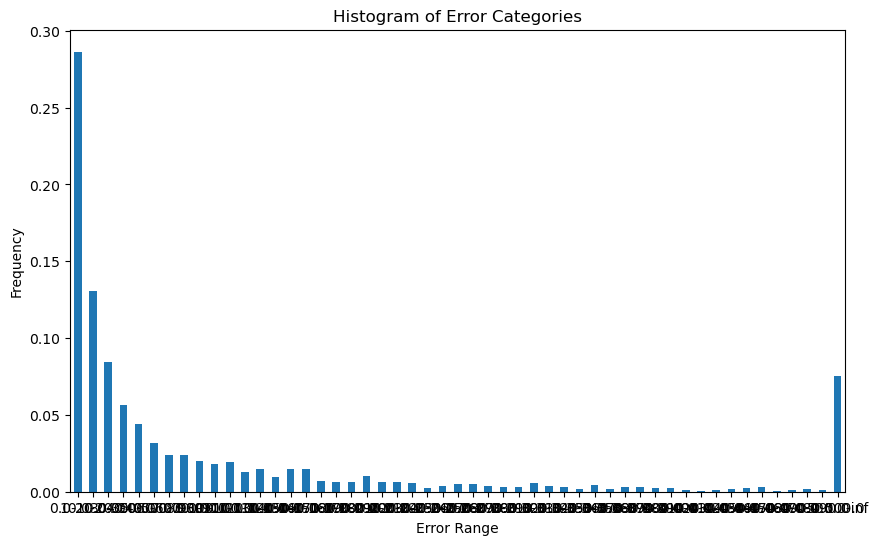

In [45]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
# category_counts_mg.plot(kind='bar')
category_counts_nacl.plot(kind='bar')
plt.xlabel('Error Range')
plt.ylabel('Frequency')
plt.title('Histogram of Error Categories')
plt.xticks(rotation=0)
plt.show()

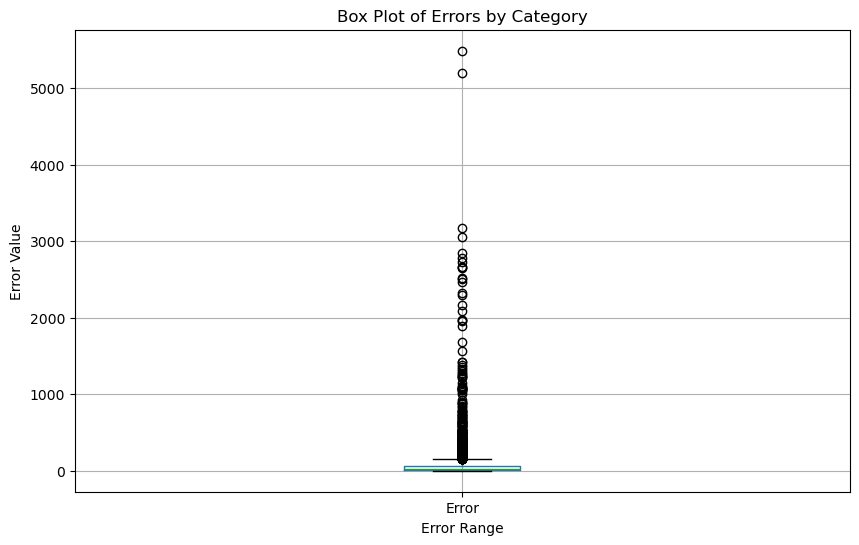

In [40]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Error')
plt.xlabel('Error Range')
plt.ylabel('Error Value')
plt.title('Box Plot of Salt Errors')
plt.suptitle('')  # Suppress the default title to avoid double titles
plt.show()

In [124]:
np.random.seed(0)
def split_n_train():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = np.random.randint(0, 100))
    # Train a Random Forest Classifier
    regressor = RandomForestRegressor(n_estimators=100, random_state = np.random.randint(0, 100))
    # Fit the model to the training data
    regressor.fit(X_train, y_train)
    return regressor, X_train, X_test, y_train, y_test 

In [126]:
results = []

for i in range(10):
    print(f"Running iteration {i}", end="\r")
    regressor_t, X_train_t, X_test_t, y_train_t, y_test_t  = split_n_train()
    y_pred_t = regressor_t.predict(X_test_t)
    error_t = (np.abs(y_test_t - y_pred_t)).mean(axis=0)
    y_pred_nacl = np.array([k[0] for k in y_pred_t])
    y_pred_mgso4 = np.array([k[1] for k in y_pred_t])
    y_test_nacl = np.array([k[0] for k in y_test_t])
    y_test_mgso4 = np.array([k[1] for k in y_test_t])
    salt_mse_t = mean_squared_error(y_test_nacl, y_pred_nacl)
    mgso_mse_t = mean_squared_error(y_test_mgso4, y_pred_mgso4)
    r2_nacl = r2_score(y_test_nacl, y_pred_nacl)
    re_mgso4 = r2_score(y_test_mgso4, y_pred_mgso4)
    results.append({"Regresson":regressor_t, "Mean Error":error_t, "Salt MSE":salt_mse_t, "MgSO4 MSE":mgso_mse_t, "R^2 Salt":r2_nacl, "R^2 MgSO4":re_mgso4})


In [127]:
results_df = pd.DataFrame(results)
print(results_df["Mean Error"].mean())

[ 64.02324635 139.91699304]


In [166]:
print((results_df[:10])["Mean Error"].mean())

[ 62.49422281 139.14632943]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


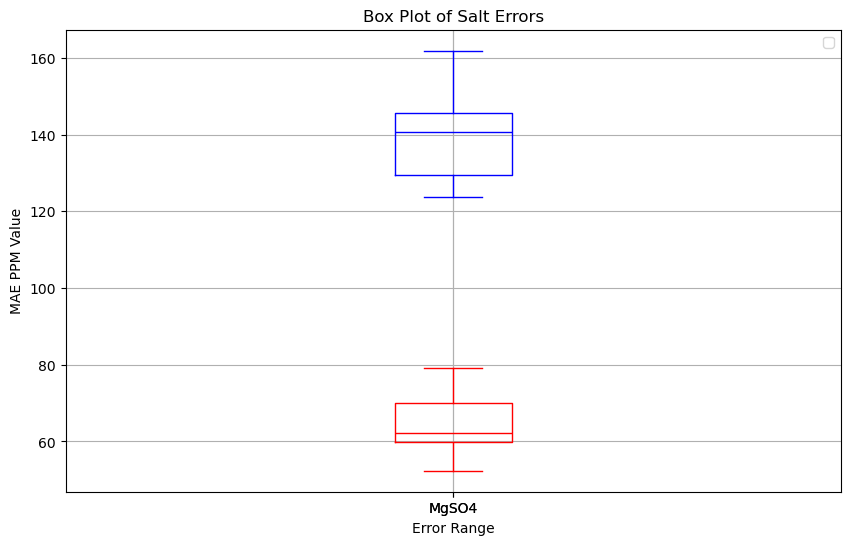

In [159]:
results_df["Salt"] = results_df["Mean Error"].apply(lambda x: x[0])
results_df["MgSO4"] = results_df["Mean Error"].apply(lambda x: x[1])
plt.figure(figsize=(10, 6))

results_df.boxplot(column='Salt', color='red', labels=['Salt'])
results_df.boxplot(column='MgSO4', color='blue', labels=['MgSO4'])
plt.xlabel('Error Range')
plt.ylabel('MAE PPM Value')
plt.title('Box Plot of Salt Errors')
plt.suptitle('')  # Suppress the default title to avoid double titles
plt.show()
# sağ tarafında da r^2 değerlerini yazdır

In [9]:

np.random.seed(0)

def kfold_train(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=np.random.randint(0, 100))
    models = []
    scores = []

    for train_index, test_index in kf.split(X):
        print(f"Running iteration {len(scores)}", end="\r")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        regressor = RandomForestRegressor(n_estimators=100, random_state=np.random.randint(0, 100))
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        error_t = (np.abs(y_test - y_pred)).mean(axis=0)
        y_pred_nacl = np.array([k[0] for k in y_pred])
        y_pred_mgso4 = np.array([k[1] for k in y_pred])
        y_test_nacl = np.array([k[0] for k in y_test])
        y_test_mgso4 = np.array([k[1] for k in y_test])
        salt_mse_t = mean_squared_error(y_test_nacl, y_pred_nacl)
        mgso_mse_t = mean_squared_error(y_test_mgso4, y_pred_mgso4)
        r2_nacl = r2_score(y_test_nacl, y_pred_nacl)
        re_mgso4 = r2_score(y_test_mgso4, y_pred_mgso4)
        scores.append({"Mean Error":error_t, "Salt MSE":salt_mse_t, "MgSO4 MSE":mgso_mse_t, "R^2 Salt":r2_nacl, "R^2 MgSO4":re_mgso4})
        models.append(regressor)
    scores = pd.DataFrame(scores)
    print(f"Kfold completed.                             ")
    return models, scores



In [10]:
def kfold_train_single_y(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=np.random.randint(0, 100))
    models = []
    scores = []

    for train_index, test_index in kf.split(X):
        print(f"Running iteration {len(scores)}", end="\r")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        regressor = RandomForestRegressor(n_estimators=100, random_state=np.random.randint(0, 100))
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)
        error_t = (np.abs(y_test - y_pred)).mean(axis=0)
        mse_t = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        scores.append({"Mean Error":error_t, "MSE":mse_t, "R^2":r2})
        models.append(regressor)
    scores = pd.DataFrame(scores)
    print(f"Kfold completed.                             ")
    return models, scores

In [11]:
models_all, avg_score_all = kfold_train(np.array(X), np.array(y), n_splits=5)


Kfold completed.                             


In [12]:
avg_score_all.to_csv("score_all.csv")

In [21]:
print(avg_score_all["Mean Error"].mean())
print(avg_score_all["R^2 Salt"].mean())
print(avg_score_all["R^2 MgSO4"].mean())

[ 55.44532168 121.46200204]
0.9977736494578238
0.990267634915557


In [178]:
models = models_all
results2 = []
for model in models:
    y_pred_t = model.predict(X_test_t)
    error_t = (np.abs(y_test_t - y_pred_t)).mean(axis=0)
    y_pred_nacl = np.array([k[0] for k in y_pred_t])
    y_pred_mgso4 = np.array([k[1] for k in y_pred_t])
    y_test_nacl = np.array([k[0] for k in y_test_t])
    y_test_mgso4 = np.array([k[1] for k in y_test_t])
    salt_mse_t = mean_squared_error(y_test_nacl, y_pred_nacl)
    mgso_mse_t = mean_squared_error(y_test_mgso4, y_pred_mgso4)
    r2_nacl = r2_score(y_test_nacl, y_pred_nacl)
    re_mgso4 = r2_score(y_test_mgso4, y_pred_mgso4)
    results2.append({"Mean Error":error_t, "Salt MSE":salt_mse_t, "MgSO4 MSE":mgso_mse_t, "R^2 Salt":r2_nacl, "R^2 MgSO4":re_mgso4})


In [181]:
results2 = pd.DataFrame(results2)
print(results2["Mean Error"].mean())
print(results2["R^2 Salt"].mean())
print(results2["R^2 MgSO4"].mean())

[29.40671955 63.66247513]
0.9992116962435758
0.9962025632755204


In [180]:
results2

,Mean Error,Salt MSE,MgSO4 MSE,R^2 Salt,R^2 MgSO4
0,"[31.24859615488376, 72.0342465151695]",31519.592813,280335.296953,0.999170,0.991829
1,"[29.176261526655345, 66.04594782705963]",35956.254341,95986.318014,0.999054,0.997202
2,"[28.89871126222101, 62.392874605630084]",21962.237860,84275.232933,0.999422,0.997544
3,"[27.284685044268286, 56.86912008583949]",25841.665482,84184.232364,0.999320,0.997546
4,"[30.42534374238887, 60.970186619802206]",34457.418184,106673.434739,0.999093,0.996891


In [21]:
# Print the actual and predicted values side by side
print("Actual values vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted}')

Actual values vs Predicted values:
Actual: (15597.108775137112, 13805.518281535651), Predicted: [15607.66049328 13769.08412009]
Actual: (4018.169112508735, 4018.169112508735), Predicted: [4000.11569318 4000.11569318]
Actual: (13105.839384828863, 15946.958718778907), Predicted: [13115.30525103 15942.22564369]
Actual: (0.0, 1250.6680919294497), Predicted: [  49.41236019 1221.88778966]
Actual: (9504.51647183847, 15000.0), Predicted: [ 9538.61958627 14930.52888626]
Actual: (0.0, 9925.307557117749), Predicted: [  59.27662425 9892.19572311]
Actual: (17023.75, 10952.321428571428), Predicted: [17000.47061279 10998.87880625]
Actual: (9123.670103092783, 17938.103092783505), Predicted: [ 9122.21288831 17938.83172203]
Actual: (9294.772656974948, 9294.772656974948), Predicted: [9292.70827653 9292.70827653]
Actual: (12908.6809470124, 12908.6809470124), Predicted: [12906.55294052 12906.55294052]
Actual: (13250.488690309969, 13250.488690309969), Predicted: [13255.38009986 13255.38009986]
Actual: (0.0,

In [13]:
def arrangeDataSingleColumn(dict,column):
    compArr = []
    for vals in list(dict.values()):
        compArr.append(vals[column] - np.array(vals[column]).mean())
    
    return compArr

In [14]:
resultDict = {}

for i, column in enumerate(columns):
    print(f"Processing {column} -- {i}/{len(columns)}                    ", end = '\r')
    if column == 'NaCl_ppm' or column == 'MgSO4_ppm' or column == 'Iteration' or column == 'Time':
        continue
    selected_column_X = arrangeDataSingleColumn(grouped_dict,column)
    np.random.seed(0)
    models, score = kfold_train(np.array(selected_column_X), np.array(y), n_splits=5)
    

    resultDict[column] = {'models': models, 'score': score}

resultDict = pd.DataFrame(resultDict)
resultDict.to_csv("resultDict.csv")
    
print(f"-- Process Complete --                                             ", end = '\r')

NameError: name 'get' is not defined

In [24]:
for a in resultDict:
    print(f"{a}: salt: {resultDict[a]["salt_mae"]}, mgso: {resultDict[a]['mgso_mae']}")


Hz: salt: 5421.576720164521, mgso: 5118.363666230603
Impedance: salt: 159.76054573594882, mgso: 333.81515890160875
ImpedancePhase: salt: 251.61364178800835, mgso: 439.148602301135
Resistance: salt: 174.66245995359932, mgso: 326.1945490074233
Reactance: salt: 172.50398242886604, mgso: 409.7757889480524
Admittance: salt: 177.9884781225516, mgso: 466.92011448287286
AdmittancePhase: salt: 251.4458283262192, mgso: 437.31436528920165
Conductance: salt: 166.42937288287476, mgso: 432.69945623479646
Susceptance: salt: 245.88269620813568, mgso: 800.7120112183018
SeriesCapacitance: salt: 969.5312330286266, mgso: 1493.3496842230713
ParallelCapacitance: salt: 5421.576720164521, mgso: 5118.363666230603
SeriesInductance: salt: 248.54456327792374, mgso: 401.0629554917341
ParallelInductance: salt: 638.1568647614905, mgso: 1445.6739675349202
Dissipation: salt: 1290.4710839537422, mgso: 2268.6644638138455
Vrms: salt: 198.50143415343908, mgso: 429.54639501753445
Vreal: salt: 222.34839194063096, mgso: 501.

In [ ]:
def arrangeDataMultiColumn(dict,columns):
    compArr = []
    for vals in list(dict.values()):
        arr = []
        for col in columns:
            arr.extend(vals[col].copy() - np.array(vals[col]).mean())
        compArr.append(arr.copy())
    
    return compArr

In [ ]:
#both
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Impedance", "ImpedancePhase","Resistance", "Conductance"])
models_both ,score_both = kfold_train(np.array(selected_column_X), np.array(y), n_splits=5)

Kfold completed.                             


In [ ]:
#only salt no mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Impedance", "ImpedancePhase","Resistance", "Conductance"])
models_only_salt ,score_only_salt = kfold_train_single_y(np.array(selected_column_X), np.array([k[0] for k in y]), n_splits=5)

NameError: name 'arrangeDataMultiColumn' is not defined

In [ ]:
#only salt no mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Impedance", "ImpedancePhase","Resistance", "Conductance"])
models_only_mg ,score_only_mg = kfold_train_single_y(np.array(selected_column_X), np.array([k[1] for k in y]), n_splits=5)

MgSO4 MAE: 291.94925928844697
MgSO4 MSE: 1048303.9913051897
R^2 Score: 0.9701380542341355


In [ ]:
#only salt given mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Impedance", "ImpedancePhase","Resistance", "Conductance"])
for i in range(len(selected_column_X)):
    selected_column_X[i].append(y[i][1])
models_nacl ,score_nacl = kfold_train_single_y(np.array(selected_column_X), np.array([k[0] for k in y]), n_splits=5)

Salt MAE: 77.16840664115023
Salt MSE: 68911.02990401808
R^2 Score: 0.9981730617061214


In [ ]:
#only mgso4 given nacl 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Impedance", "ImpedancePhase","Resistance", "Conductance"])
for i in range(len(selected_column_X)):
    selected_column_X[i].append(y[i][0])
models_mg ,score_mg = kfold_train_single_y(np.array(selected_column_X), np.array([k[1] for k in y]), n_splits=5)

MgSO4 MAE: 278.08514347774417
MgSO4 MSE: 940219.9292769771
R^2 Score: 0.9732169325225051


In [ ]:
#both
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Ireal", "Iimag","Vreal", "Vimag"])
models_bothV ,score_bothV = kfold_train(np.array(selected_column_X), np.array(y), n_splits=5)

KeyboardInterrupt: 

In [ ]:
#only salt no mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Ireal", "Iimag","Vreal", "Vimag"])
models_only_saltV ,score_only_saltV = kfold_train_single_y(np.array(selected_column_X), np.array([k[0] for k in y]), n_splits=5)

In [ ]:
#only salt no mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Ireal", "Iimag","Vreal", "Vimag"])
models_only_mgV ,score_only_mgV = kfold_train_single_y(np.array(selected_column_X), np.array([k[1] for k in y]), n_splits=5)

In [ ]:
#only salt given mgso4 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Ireal", "Iimag","Vreal", "Vimag"])
for i in range(len(selected_column_X)):
    selected_column_X[i].append(y[i][1])
models_naclV ,score_naclV = kfold_train_single_y(np.array(selected_column_X), np.array([k[0] for k in y]), n_splits=5)

In [ ]:
#only mgso4 given nacl 4 only Impedace, phase, resistance, conductance
selected_column_X = arrangeDataMultiColumn(grouped_dict,["Ireal", "Iimag","Vreal", "Vimag"])
for i in range(len(selected_column_X)):
    selected_column_X[i].append(y[i][0])
models_mgV ,score_mgV = kfold_train_single_y(np.array(selected_column_X), np.array([k[1] for k in y]), n_splits=5)